In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

import tensorflow as tf

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'

df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [3]:
len(df)

13204962

In [4]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             318
      1             224
1     0             246
      1             171
2     0             323
      1             252
3     0             256
      1             162
4     0             270
      1             167

In [5]:
df_visual= df.head(100000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

<AxesSubplot:>

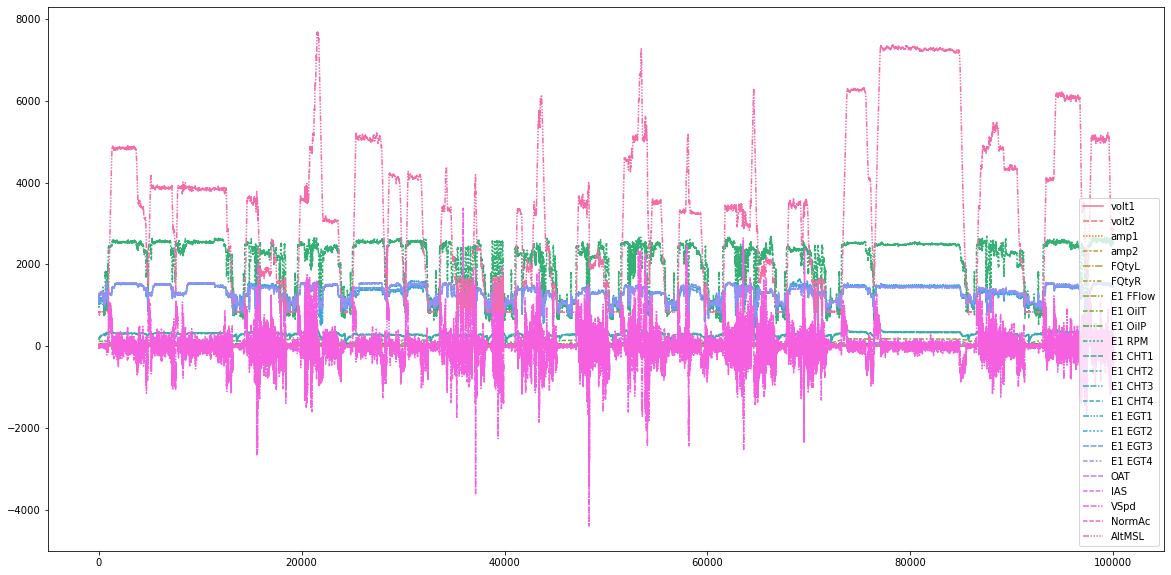

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_visual)

In [7]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

array([[<AxesSubplot:title={'center':'volt1'}>,
        <AxesSubplot:title={'center':'volt2'}>,
        <AxesSubplot:title={'center':'amp1'}>,
        <AxesSubplot:title={'center':'amp2'}>,
        <AxesSubplot:title={'center':'FQtyL'}>],
       [<AxesSubplot:title={'center':'FQtyR'}>,
        <AxesSubplot:title={'center':'E1 FFlow'}>,
        <AxesSubplot:title={'center':'E1 OilT'}>,
        <AxesSubplot:title={'center':'E1 OilP'}>,
        <AxesSubplot:title={'center':'E1 RPM'}>],
       [<AxesSubplot:title={'center':'E1 CHT1'}>,
        <AxesSubplot:title={'center':'E1 CHT2'}>,
        <AxesSubplot:title={'center':'E1 CHT3'}>,
        <AxesSubplot:title={'center':'E1 CHT4'}>,
        <AxesSubplot:title={'center':'E1 EGT1'}>],
       [<AxesSubplot:title={'center':'E1 EGT2'}>,
        <AxesSubplot:title={'center':'E1 EGT3'}>,
        <AxesSubplot:title={'center':'E1 EGT4'}>,
        <AxesSubplot:title={'center':'OAT'}>,
        <AxesSubplot:title={'center':'IAS'}>],
       [<AxesSubpl

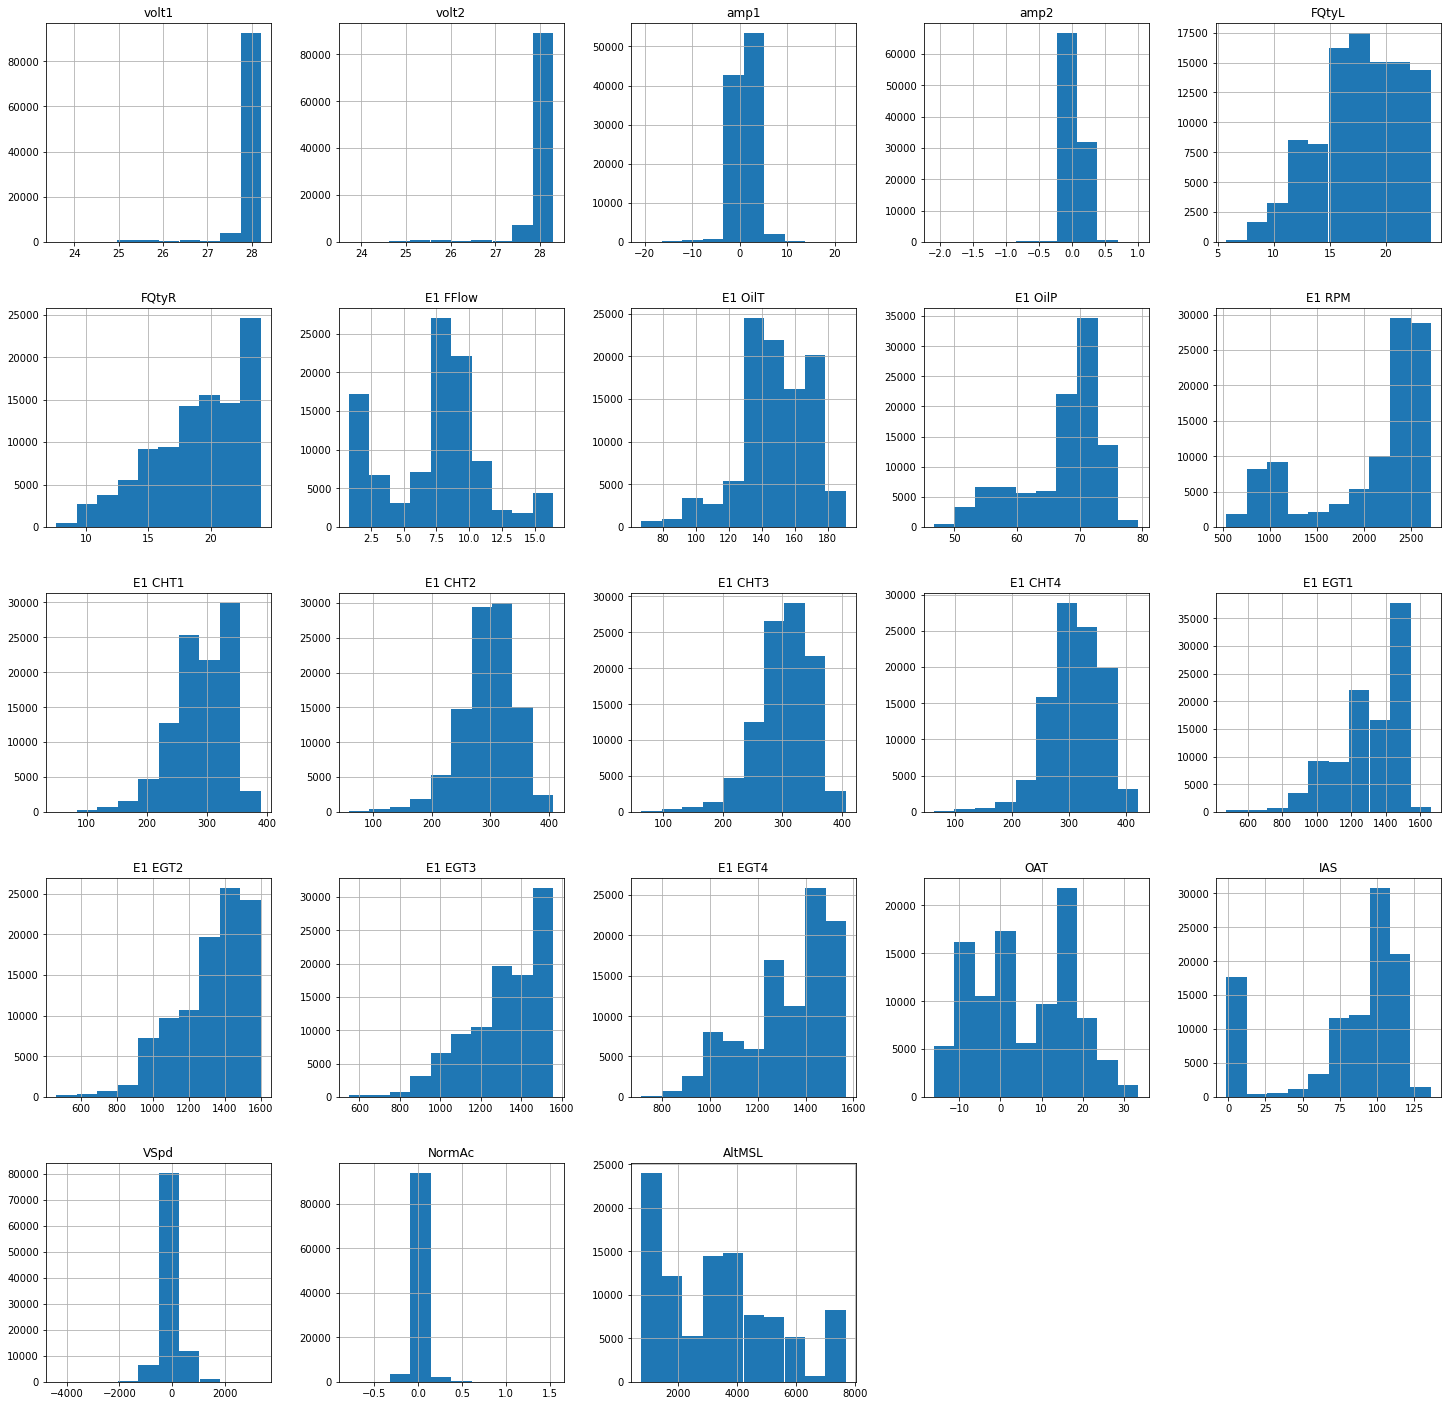

In [8]:
df_visual.hist(figsize = (25,25),column=input_columns)

In [9]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100014
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volt1     100000 non-null  float16
 1   volt2     100000 non-null  float16
 2   amp1      100000 non-null  float16
 3   amp2      100000 non-null  float16
 4   FQtyL     100000 non-null  float16
 5   FQtyR     100000 non-null  float16
 6   E1 FFlow  100000 non-null  float16
 7   E1 OilT   100000 non-null  float16
 8   E1 OilP   100000 non-null  float16
 9   E1 RPM    100000 non-null  float16
 10  E1 CHT1   100000 non-null  float16
 11  E1 CHT2   100000 non-null  float16
 12  E1 CHT3   100000 non-null  float16
 13  E1 CHT4   100000 non-null  float16
 14  E1 EGT1   100000 non-null  float16
 15  E1 EGT2   100000 non-null  float16
 16  E1 EGT3   100000 non-null  float16
 17  E1 EGT4   100000 non-null  float16
 18  OAT       100000 non-null  float16
 19  IAS       100000 non-null  float16
 20  VSpd

In [10]:
df_visual.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
0,27.90625,27.90625,7.898438,0.700195,24.0,24.0,2.089844,129.250,61.15625,1191.0,...,181.750,1081.0,1156.0,1112.0,1255.0,7.199219,0.0,15.742188,-0.020004,822.5
1,27.90625,27.90625,7.898438,0.600098,24.0,24.0,2.130859,129.250,61.18750,1192.0,...,181.875,1082.0,1158.0,1114.0,1257.0,7.199219,0.0,11.132812,-0.000000,822.5
3,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.250,61.15625,1190.0,...,182.750,1094.0,1173.0,1125.0,1267.0,7.199219,0.0,-30.640625,-0.029999,824.5
4,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.080078,129.125,61.25000,1197.0,...,183.125,1098.0,1178.0,1129.0,1271.0,7.199219,0.0,-23.953125,-0.020004,825.0
5,27.90625,27.90625,7.601562,0.600098,24.0,24.0,2.060547,129.125,61.12500,1190.0,...,183.500,1101.0,1183.0,1133.0,1277.0,7.000000,0.0,-6.941406,-0.010002,824.5
6,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.000,61.09375,1185.0,...,184.000,1105.0,1190.0,1138.0,1282.0,7.000000,0.0,-19.156250,0.010002,824.0
7,27.90625,28.00000,7.800781,0.600098,24.0,24.0,2.060547,129.000,60.90625,1176.0,...,184.375,1109.0,1196.0,1141.0,1287.0,7.000000,0.0,-56.156250,-0.029999,824.0
8,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.070312,129.000,61.00000,1178.0,...,184.750,1112.0,1204.0,1145.0,1295.0,7.000000,0.0,-19.406250,0.040009,824.5
9,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.130859,128.875,60.87500,1174.0,...,185.125,1115.0,1212.0,1150.0,1290.0,7.000000,0.0,7.628906,0.010002,824.5
10,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.039062,128.750,61.06250,1177.0,...,185.625,1118.0,1222.0,1153.0,1292.0,7.000000,0.0,-19.406250,0.020004,825.0


In [11]:
df_visual.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000,100000.00000,100000.0,...,100000.00000,100000.00,100000.00,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,NaN,NaN,NaN,0.024185,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006409,NaN
std,0.000000,0.000000,0.000000,0.100830,0.000000,0.000000,0.000000,0.000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.070740,NaN
min,23.593750,23.703125,-20.703125,-2.099609,5.769531,7.621094,0.819824,66.750,46.71875,533.5,...,62.46875,474.75,461.25,548.0,712.0,-16.203125,-1.179688,-4396.000000,-0.790039,757.0
25%,28.000000,28.000000,0.500000,0.000000,15.210938,16.453125,4.679688,136.750,64.68750,1767.0,...,282.00000,1205.00,1218.00,1223.0,1232.0,-3.500000,70.312500,-109.562500,-0.020004,1505.0
50%,28.093750,28.093750,0.899902,0.000000,17.906250,19.562500,8.031250,146.000,69.43750,2386.0,...,312.00000,1340.00,1372.00,1351.0,1383.0,4.199219,96.562500,-0.939941,0.000000,3348.0
75%,28.093750,28.093750,1.299805,0.099976,20.968750,22.296875,9.398438,165.750,71.93750,2508.0,...,347.00000,1445.00,1486.00,1466.0,1462.0,16.203125,106.812500,82.687500,0.020004,4808.0
max,28.203125,28.296875,22.296875,1.000000,24.000000,24.000000,16.406250,191.125,79.37500,2714.0,...,422.00000,1662.00,1601.00,1558.0,1568.0,33.500000,136.000000,3374.000000,1.540039,7680.0


In [12]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 30
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 200

In [13]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

C:\Users\47008\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [15]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [16]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [17]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [18]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [19]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [20]:
def conv_model_long(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model                      

In [21]:
def conv_model_short(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model

In [22]:
cnn_long_result = {}
for i in range(NFOLD-1):   
    model_long= conv_model_long()
    model_long.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                       metrics = ['accuracy', 
                                  tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                                  tf.keras.metrics.AUC(curve='PR', name = 'PR'), ],
                       loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                      )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_long_cnn = model_long.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_long_result[i] = res_long_cnn.history
    
pd.DataFrame(cnn_long_result)

Epoch 1/30
200/200 [==============================] - 58s 286ms/step - loss: 0.2145 - accuracy: 0.9078 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.2757 - val_accuracy: 0.4375 - val_ROC: 0.5129 - val_PR: 0.4506
Epoch 2/30
200/200 [==============================] - 58s 290ms/step - loss: 0.0828 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.4375 - val_ROC: 0.4992 - val_PR: 0.4367
Epoch 3/30
200/200 [==============================] - 62s 308ms/step - loss: 0.0182 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5034 - val_accuracy: 0.4375 - val_ROC: 0.4487 - val_PR: 0.4241
Epoch 4/30
200/200 [==============================] - 62s 309ms/step - loss: 0.0112 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5258 - val_accuracy: 0.4375 - val_ROC: 0.4723 - val_PR: 0.4152
Epoch 5/30
200/200 [==============================] - 59s 293ms/step - loss: 0.0103 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5351 - v

200/200 [==============================] - 56s 282ms/step - loss: 0.0079 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5767 - val_accuracy: 0.4111 - val_ROC: 0.4932 - val_PR: 0.4077
Epoch 10/30
200/200 [==============================] - 56s 281ms/step - loss: 0.0064 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.4111 - val_ROC: 0.4999 - val_PR: 0.4110
Epoch 11/30
200/200 [==============================] - 56s 281ms/step - loss: 0.0048 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5682 - val_accuracy: 0.4111 - val_ROC: 0.5250 - val_PR: 0.4237
Epoch 12/30
200/200 [==============================] - 56s 281ms/step - loss: 0.0030 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5836 - val_accuracy: 0.4111 - val_ROC: 0.4812 - val_PR: 0.4018
Epoch 13/30
200/200 [==============================] - 56s 279ms/step - loss: 0.0017 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5801 - val_accu

200/200 [==============================] - 57s 285ms/step - loss: 9.4922e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5353 - val_accuracy: 0.4632 - val_ROC: 0.4936 - val_PR: 0.4600
Epoch 18/30
200/200 [==============================] - 57s 284ms/step - loss: 7.4362e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5351 - val_accuracy: 0.4632 - val_ROC: 0.5040 - val_PR: 0.4653
Epoch 19/30
200/200 [==============================] - 57s 284ms/step - loss: 4.6319e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5355 - val_accuracy: 0.4632 - val_ROC: 0.4911 - val_PR: 0.4587
Epoch 20/30
200/200 [==============================] - 57s 285ms/step - loss: 3.7662e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5358 - val_accuracy: 0.4632 - val_ROC: 0.5035 - val_PR: 0.4650
Epoch 21/30
200/200 [==============================] - 57s 284ms/step - loss: 2.6619e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_los

200/200 [==============================] - 57s 287ms/step - loss: 2.2328e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6095 - val_accuracy: 0.3894 - val_ROC: 0.5012 - val_PR: 0.3900
Epoch 26/30
200/200 [==============================] - 58s 288ms/step - loss: 1.7327e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6100 - val_accuracy: 0.3894 - val_ROC: 0.4902 - val_PR: 0.3847
Epoch 27/30
200/200 [==============================] - 57s 287ms/step - loss: 1.4562e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6096 - val_accuracy: 0.3894 - val_ROC: 0.4908 - val_PR: 0.3850
Epoch 28/30
200/200 [==============================] - 58s 288ms/step - loss: 1.1286e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6102 - val_accuracy: 0.3894 - val_ROC: 0.4913 - val_PR: 0.3853
Epoch 29/30
200/200 [==============================] - 57s 287ms/step - loss: 1.0175e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_los

,0,1,2,3
loss,"[0.2144729048013687, 0.0827813372015953, 0.018...","[0.18213926255702972, 0.053209446370601654, 0....","[0.1631975919008255, 0.033041760325431824, 0.0...","[0.1969938427209854, 0.06221683323383331, 0.01..."
accuracy,"[0.9078124761581421, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993749856948853, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9995312690734863, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9459375143051147, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953...","[0.9999999403953552, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 0.9999999403953552, 0.9999999403953552, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953552, ..."
val_loss,"[0.2757258713245392, 0.42382028698921204, 0.50...","[0.30842188000679016, 0.4710756540298462, 0.52...","[0.3297588527202606, 0.4608318507671356, 0.503...","[0.3051176071166992, 0.4759799540042877, 0.546..."
val_accuracy,"[0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.437...","[0.4110576808452606, 0.4110576808452606, 0.411...","[0.4632352888584137, 0.4632352888584137, 0.463...","[0.38942307233810425, 0.38942307233810425, 0.3..."
val_ROC,"[0.5128580927848816, 0.4992249608039856, 0.448...","[0.4912042021751404, 0.494832307100296, 0.5505...","[0.4406392574310303, 0.49300116300582886, 0.49...","[0.49997568130493164, 0.4513949751853943, 0.53..."
val_PR,"[0.45063766837120056, 0.43672484159469604, 0.4...","[0.3944735527038574, 0.40372681617736816, 0.45...","[0.43748509883880615, 0.484980046749115, 0.463...","[0.4038745164871216, 0.36007851362228394, 0.40..."


In [23]:
cnn_short_result = {}
for i in range(NFOLD-1):   
    model_short= conv_model_short()
    model_short.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = ['accuracy', 
                                  tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                                  tf.keras.metrics.AUC(curve='PR', name = 'PR'), ],
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_short_cnn = model_short.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_short_result[i] = res_short_cnn.history
    
pd.DataFrame(cnn_short_result)

Epoch 1/30
200/200 [==============================] - 6s 28ms/step - loss: 0.2667 - accuracy: 0.0503 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.2495 - val_accuracy: 0.5684 - val_ROC: 0.5387 - val_PR: 0.4711
Epoch 2/30
200/200 [==============================] - 5s 26ms/step - loss: 0.2358 - accuracy: 0.9030 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.2560 - val_accuracy: 0.4355 - val_ROC: 0.5285 - val_PR: 0.4560
Epoch 3/30
200/200 [==============================] - 5s 26ms/step - loss: 0.1957 - accuracy: 0.9997 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.4375 - val_ROC: 0.4976 - val_PR: 0.4509
Epoch 4/30
200/200 [==============================] - 5s 26ms/step - loss: 0.1580 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.2839 - val_accuracy: 0.4375 - val_ROC: 0.5181 - val_PR: 0.4573
Epoch 5/30
200/200 [==============================] - 5s 26ms/step - loss: 0.1196 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.3108 - val_accurac

200/200 [==============================] - 5s 25ms/step - loss: 0.0128 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5150 - val_accuracy: 0.4111 - val_ROC: 0.5365 - val_PR: 0.4351
Epoch 11/30
200/200 [==============================] - 5s 25ms/step - loss: 0.0133 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5371 - val_accuracy: 0.4111 - val_ROC: 0.4907 - val_PR: 0.4215
Epoch 12/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0116 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5340 - val_accuracy: 0.4111 - val_ROC: 0.4966 - val_PR: 0.3969
Epoch 13/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0120 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5417 - val_accuracy: 0.4111 - val_ROC: 0.4671 - val_PR: 0.3847
Epoch 14/30
200/200 [==============================] - 5s 25ms/step - loss: 0.0111 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5472 - val_accuracy: 0.41

200/200 [==============================] - 5s 26ms/step - loss: 0.0085 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.4632 - val_ROC: 0.5063 - val_PR: 0.4724
Epoch 20/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0094 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5174 - val_accuracy: 0.4632 - val_ROC: 0.4916 - val_PR: 0.4513
Epoch 21/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0090 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5206 - val_accuracy: 0.4632 - val_ROC: 0.4754 - val_PR: 0.4448
Epoch 22/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0091 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5171 - val_accuracy: 0.4632 - val_ROC: 0.5453 - val_PR: 0.4962
Epoch 23/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0089 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5248 - val_accuracy: 0.46

200/200 [==============================] - 5s 26ms/step - loss: 0.0075 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6087 - val_accuracy: 0.3894 - val_ROC: 0.4745 - val_PR: 0.3773
Epoch 29/30
200/200 [==============================] - 5s 27ms/step - loss: 0.0067 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.5908 - val_accuracy: 0.3894 - val_ROC: 0.5027 - val_PR: 0.3907
Epoch 30/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0065 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - val_loss: 0.6030 - val_accuracy: 0.3894 - val_ROC: 0.4814 - val_PR: 0.3804


,0,1,2,3
loss,"[0.2666763365268707, 0.23581302165985107, 0.19...","[0.199338898062706, 0.14922109246253967, 0.103...","[0.23122626543045044, 0.18273964524269104, 0.1...","[0.20440860092639923, 0.16823822259902954, 0.1..."
accuracy,"[0.050312500447034836, 0.9029687643051147, 0.9...","[0.9998437762260437, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9815624952316284, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9995312690734863, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953552, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
val_loss,"[0.24953126907348633, 0.2559671103954315, 0.26...","[0.27132993936538696, 0.29720789194107056, 0.3...","[0.2551392912864685, 0.27029886841773987, 0.29...","[0.2719951272010803, 0.2910061776638031, 0.321..."
val_accuracy,"[0.568359375, 0.435546875, 0.4375, 0.4375, 0.4...","[0.4110576808452606, 0.4110576808452606, 0.411...","[0.4632352888584137, 0.4632352888584137, 0.463...","[0.38942307233810425, 0.38942307233810425, 0.3..."
val_ROC,"[0.538690447807312, 0.5285217761993408, 0.4976...","[0.5293949246406555, 0.5452560186386108, 0.515...","[0.4599301815032959, 0.48628780245780945, 0.54...","[0.4850417971611023, 0.44145524501800537, 0.49..."
val_PR,"[0.471078097820282, 0.4560447037220001, 0.4509...","[0.4279605448246002, 0.45132070779800415, 0.43...","[0.4259437322616577, 0.45381680130958557, 0.49...","[0.375045508146286, 0.3434985280036926, 0.3981..."


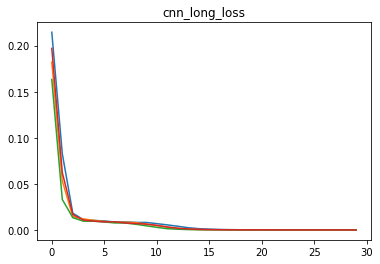

In [24]:
plt.title('cnn_long_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['loss'])

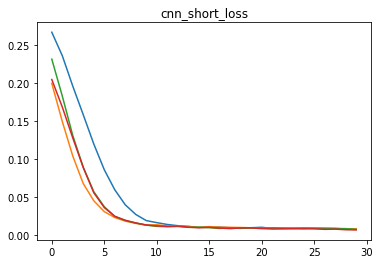

In [25]:
plt.title('cnn_short_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['loss'])

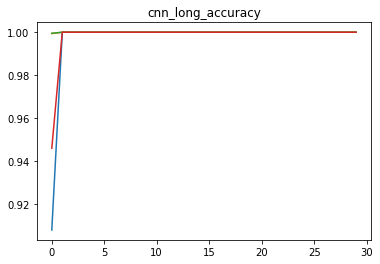

In [27]:
plt.title("cnn_long_accuracy")
for i in range(4):
    plt.plot(cnn_long_result[i]['accuracy'])

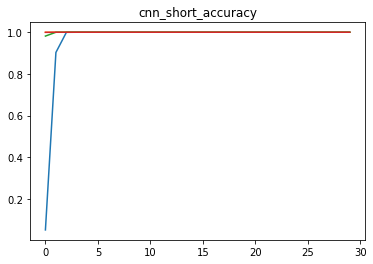

In [28]:
plt.title("cnn_short_accuracy")
for i in range(4):
    plt.plot(cnn_short_result[i]['accuracy'])

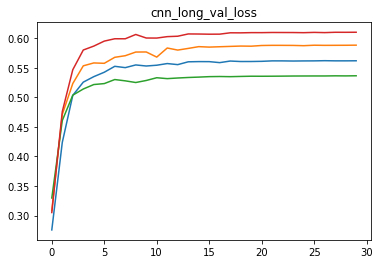

In [29]:
plt.title('cnn_long_val_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['val_loss'])

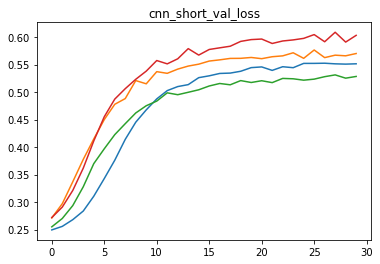

In [30]:
plt.title('cnn_short_val_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['val_loss'])

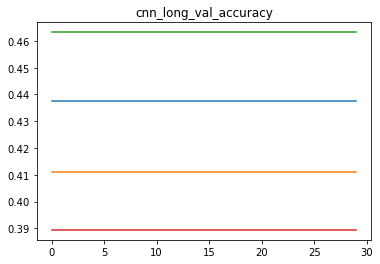

In [31]:
plt.title("cnn_long_val_accuracy")
for i in range(4):
    plt.plot(cnn_long_result[i]['val_accuracy'])

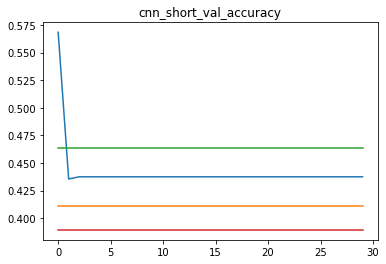

In [32]:
plt.title("cnn_short_val_accuracy")
for i in range(4):
    plt.plot(cnn_short_result[i]['val_accuracy'])

In [33]:
for i in range(4):
    score_long = np.asarray(cnn_long_result[i]['loss'])
    loss_long_score =  np.median(score_long, axis=0)
    score_short = np.asarray(cnn_short_result[i]['loss'])
    loss_short_score = np.median(score_short, axis=0)

In [ ]:
loss_long_score

In [ ]:
loss_short_score

In [ ]:
cnn_predict_long = model_long.predict(test_dataset, verbose = True)
plt.title("long_prediction")
plt.plot(cnn_predict_long)

In [ ]:
cnn_predict_short = model_short.predict(test_dataset, verbose = True)
plt.title("short_prediction")
plt.plot(cnn_predict_short)